# 1.7 Network graph visualization

### Importing Libraries and Data

In [16]:
import pandas as pd
import numpy as np
import networkx as nx
import os
import matplotlib.pyplot as plt
from pyvis.network import Network
import seaborn as sns
import pyvis

In [17]:
# importing relationship data

relationship_df = pd.read_csv('country_relationships.csv', index_col = 0)

In [18]:
relationship_df

,source,target,value
0,France,Russia,6
1,Russia,Germany,20
2,Germany,Austria,11
3,Austria,Hungary,6
4,Hungary,Bulgaria,6
...,...,...,...
91,Italy,Greece,2
92,Italy,Japan,6
93,Romania,Russia,6
94,Lebanon,India,2


### Creating Network Graphs

In [20]:
#creating a network object

G = nx.from_pandas_edgelist(relationship_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

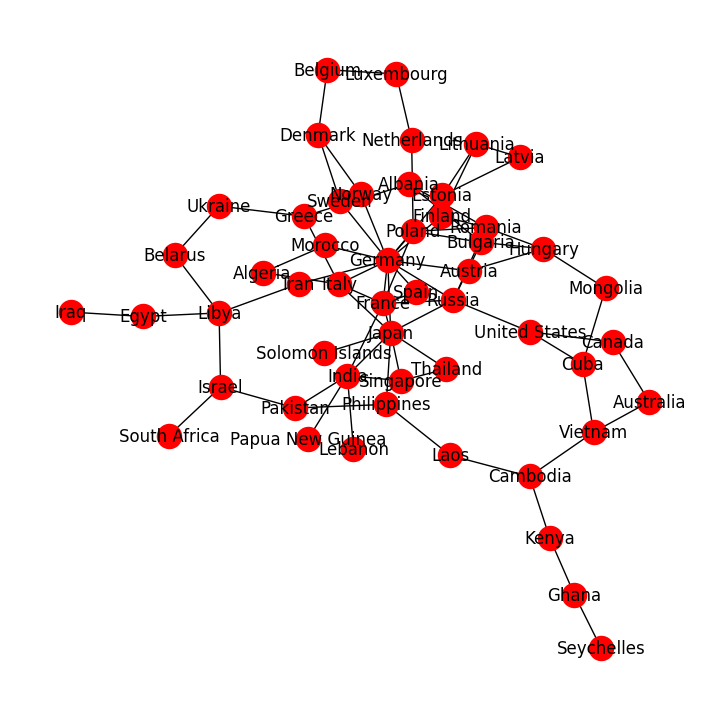

In [21]:
#creating a static network graph using only NetworkX.
h = plt.figure(figsize = (7,7))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels = True, node_color = 'red', edge_cmap = plt.cm.Blues, pos = pos)
plt.show() 

In [22]:
#creating a network graph using pyvis
# Define net object

net = Network()
net = Network(notebook = True,width="900px", height="800px", bgcolor='#222222', font_color='white')

# Define nodes from the G object
node_degree = dict(G.degree)

# Setting up node size attributes
nx.set_node_attributes(G, node_degree, 'size')
net.from_nx(G)
net.show_buttons(filter_ = True)
net.repulsion()
net.show("pyvis_network_graph.html")

pyvis_network_graph.html


### Community detection - Leiden algorithm

In [24]:
import sys
!{sys.executable} -m pip install python-igraph
!{sys.executable} -m pip install leidenalg

In [25]:
from cdlib import algorithms
coms = algorithms.leiden(G)

Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'bayanpy', 'wurlitzer', 'graph_tool'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'ASLPAw', 'pyclustering'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'wurlitzer'}


In [26]:
type(coms)

cdlib.classes.node_clustering.NodeClustering

In [27]:
new_com = coms.to_node_community_map()

In [28]:
new_com

defaultdict(list,
            {'Laos': [0],
             'Cambodia': [0],
             'Kenya': [0],
             'Ghana': [0],
             'Seychelles': [0],
             'Mongolia': [0],
             'Cuba': [0],
             'United States': [0],
             'Canada': [0],
             'Australia': [0],
             'Vietnam': [0],
             'Japan': [1],
             'Thailand': [1],
             'Singapore': [1],
             'Philippines': [1],
             'Solomon Islands': [1],
             'India': [1],
             'Pakistan': [1],
             'Papua New Guinea': [1],
             'Lebanon': [1],
             'Greece': [2],
             'Ukraine': [2],
             'Belarus': [2],
             'Libya': [2],
             'Egypt': [2],
             'Iraq': [2],
             'Israel': [2],
             'South Africa': [2],
             'Iran': [2],
             'France': [3],
             'Germany': [3],
             'Italy': [3],
             'Spain': [3],
             '

In [29]:
# putting the output from new_com into a dictionary

dict_com = {k:v[0] for k,v in new_com.items()}

In [30]:
dict_com

{'Laos': 0,
 'Cambodia': 0,
 'Kenya': 0,
 'Ghana': 0,
 'Seychelles': 0,
 'Mongolia': 0,
 'Cuba': 0,
 'United States': 0,
 'Canada': 0,
 'Australia': 0,
 'Vietnam': 0,
 'Japan': 1,
 'Thailand': 1,
 'Singapore': 1,
 'Philippines': 1,
 'Solomon Islands': 1,
 'India': 1,
 'Pakistan': 1,
 'Papua New Guinea': 1,
 'Lebanon': 1,
 'Greece': 2,
 'Ukraine': 2,
 'Belarus': 2,
 'Libya': 2,
 'Egypt': 2,
 'Iraq': 2,
 'Israel': 2,
 'South Africa': 2,
 'Iran': 2,
 'France': 3,
 'Germany': 3,
 'Italy': 3,
 'Spain': 3,
 'Denmark': 3,
 'Norway': 3,
 'Sweden': 3,
 'Morocco': 3,
 'Algeria': 3,
 'Russia': 4,
 'Austria': 4,
 'Hungary': 4,
 'Bulgaria': 4,
 'Poland': 4,
 'Albania': 4,
 'Romania': 4,
 'Estonia': 5,
 'Latvia': 5,
 'Lithuania': 5,
 'Finland': 5,
 'Netherlands': 6,
 'Luxembourg': 6,
 'Belgium': 6}

In [31]:
# running network graph with the communities as an argument

nx.set_node_attributes(G, dict_com, 'group')
com_net = Network(notebook = True, width="1300px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show_buttons(filter_ = True)
com_net.repulsion()
com_net.show("20th_century_communities_leiden.html")

20th_century_communities_leiden.html


The partitions make sense because the countries within each community are geographically close together and/or have interacted with each other historically.  For example, the community depicted in blue includes Germany, France, Italy, and Poland.  During WWII, Germany and Italy were allied, as were France and Poland.  France and Poland were both also occupied by Germany during the war.  The yellow community includes Austria and Hungary, which were once one country, and Bulgaria and Romania, which fought over territory multiple times throughout the 20th century and were both influenced by the Soviet Union.  The red community includes, Thailand, Singapore, the Solomon Islands, and the Philippines, all of which were invaded by Japan.  From this graph, it seems that two countries heavily influenced the events of the 20th century:  Germany and Japan.  It also seems that the further a community is from these countries on the graph, the further removed it was from conflict.  

### Degree Centrality

In [34]:
degree_dict = nx.degree_centrality(G)
degree_dict

{'France': 0.13725490196078433,
 'Russia': 0.11764705882352941,
 'Germany': 0.2549019607843137,
 'Austria': 0.0392156862745098,
 'Hungary': 0.0784313725490196,
 'Bulgaria': 0.0784313725490196,
 'Italy': 0.09803921568627451,
 'Spain': 0.0392156862745098,
 'Poland': 0.09803921568627451,
 'Estonia': 0.058823529411764705,
 'Latvia': 0.0392156862745098,
 'Lithuania': 0.058823529411764705,
 'Finland': 0.058823529411764705,
 'Netherlands': 0.0392156862745098,
 'Luxembourg': 0.0392156862745098,
 'Belgium': 0.0392156862745098,
 'Denmark': 0.058823529411764705,
 'Norway': 0.0392156862745098,
 'Sweden': 0.0392156862745098,
 'Greece': 0.058823529411764705,
 'Albania': 0.058823529411764705,
 'Ukraine': 0.0392156862745098,
 'Belarus': 0.0392156862745098,
 'Libya': 0.0784313725490196,
 'Egypt': 0.0392156862745098,
 'Iraq': 0.0196078431372549,
 'Japan': 0.1764705882352941,
 'Morocco': 0.0392156862745098,
 'Algeria': 0.0392156862745098,
 'Thailand': 0.0392156862745098,
 'Singapore': 0.05882352941176470

In [35]:
degree_df = pd.DataFrame(degree_dict.items(), columns=['countries','centrality'])

In [36]:
degree_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

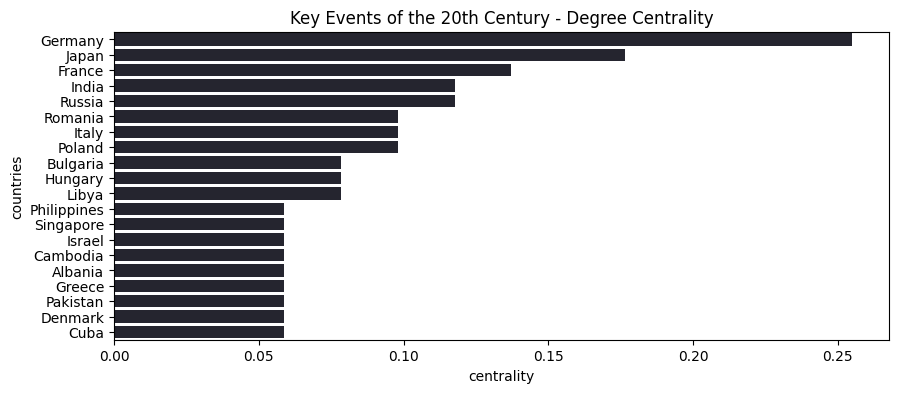

In [37]:
plt.figure(figsize = (10, 4))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = degree_df.head(20)).set_title("Key Events of the 20th Century - Degree Centrality")

Germany has the highest degree centrality meaning it had the most connections to other countries in the 20th century.  Japan has the next highest degree centrality.  This is not surprising at all given their prominence in 20th century events.  What is suprising is that Russia and India have the same degree of centrality.  I would expect Russia to have more degree centrality given the influence of the Soviet Union and the Cold War during the time period.  

## Closeness centrality

In [40]:
closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame(closeness_dict.items(), columns=['countries','centrality'])

In [41]:
closeness_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

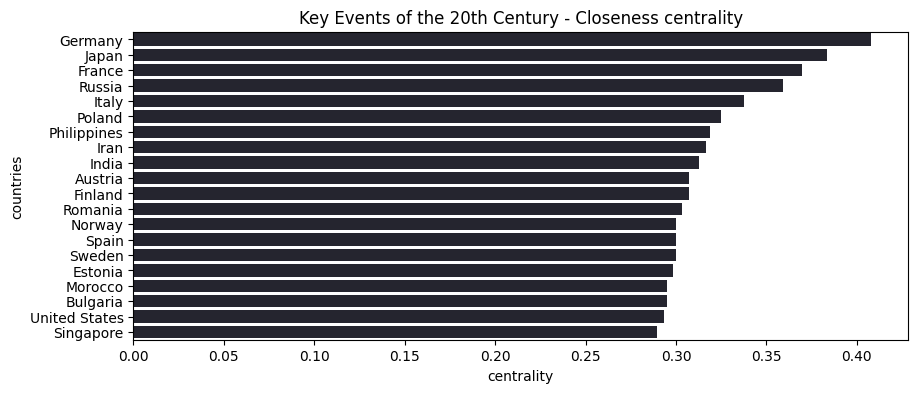

In [42]:
plt.figure(figsize = (10, 4))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = closeness_df.head(20)).set_title("Key Events of the 20th Century - Closeness centrality")

The results are similar to the degree centrality results with Germany and Japan at the top.  However, all the top 20 countries have a high level of closeness.  This is because all of them are somehow connected to those two countries.  

## Betweeness Centrality

In [45]:
betweenness_dict = nx.betweenness_centrality(G)
betweennes_df = pd.DataFrame(betweenness_dict.items(), columns=['countries','centrality'])

In [46]:
betweennes_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

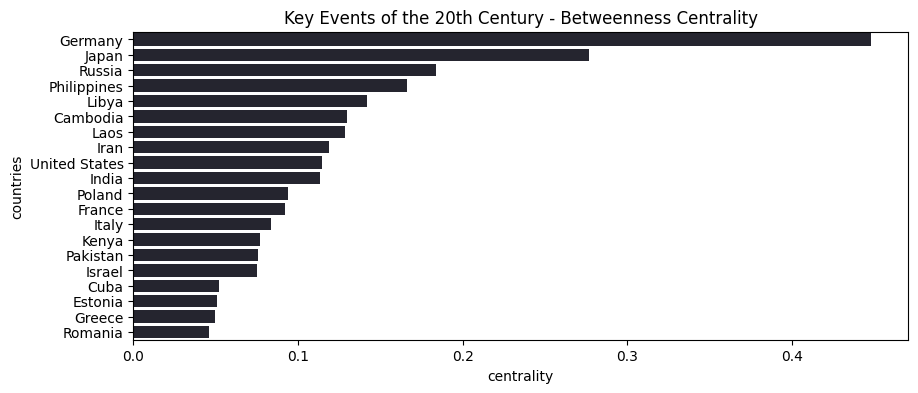

In [47]:
plt.figure(figsize = (10, 4))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = betweennes_df.head(20)).set_title("Key Events of the 20th Century - Betweenness Centrality")

Germany and Japan have the most betweenness centrality meaning they lie in the highest number of paths and act as major bridges between different parts of the network.  This makes sense and reinforces what the results of the degree centrality established: Germany and Japan were the most influential countries in the 20th century.  What is suprising is that the 4th highest betweenness centrality belongs to the Philippines.  However, I suppose due to its location, it made for a good bridge between different parts of the world during the 20th Century.